<a href="https://colab.research.google.com/github/FaithoverCP/SHURE/blob/main/directional_ai_arc_solver_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Install necessary libraries
!pip install numpy matplotlib

Saving b7999b51.json to b7999b51 (3).json


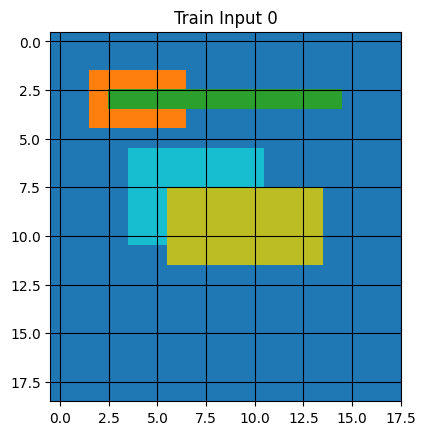

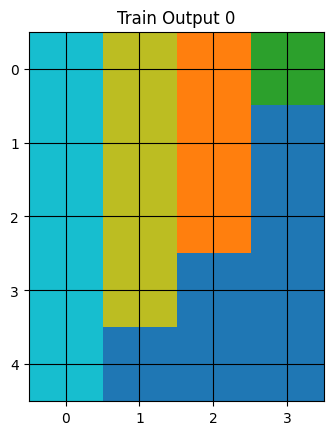

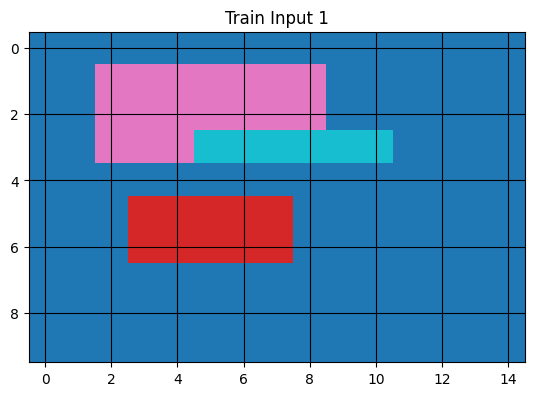

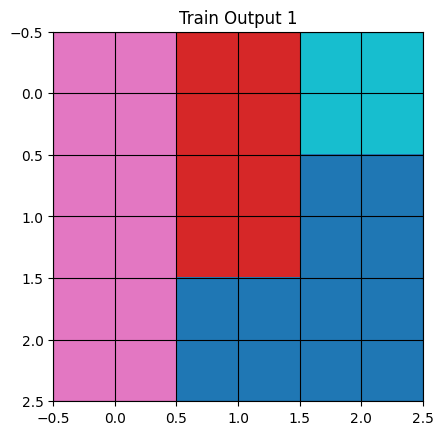

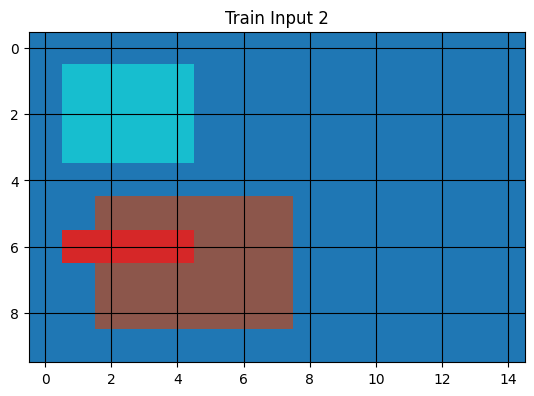

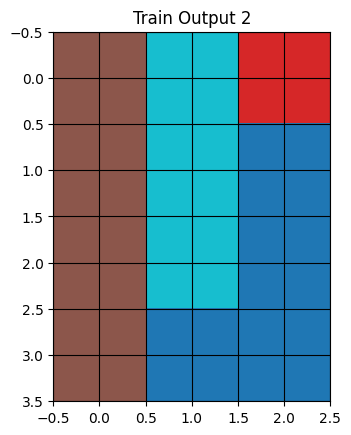

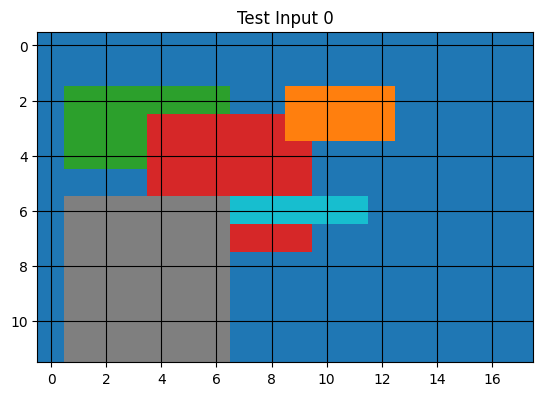

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload ARC JSON Task file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load task data
def load_arc_task(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

# Visualize grids
def visualize_grid(grid, title=''):
    plt.imshow(grid, cmap='tab10', interpolation='none')
    plt.title(title)
    plt.grid(True, color='black')
    plt.show()

# Parse and visualize
def parse_and_visualize(data):
    for i, example in enumerate(data['train']):
        visualize_grid(np.array(example['input']), title=f'Train Input {i}')
        visualize_grid(np.array(example['output']), title=f'Train Output {i}')

    for i, example in enumerate(data['test']):
        visualize_grid(np.array(example['input']), title=f'Test Input {i}')

# Main execution
task_data = load_arc_task(filename)
parse_and_visualize(task_data)



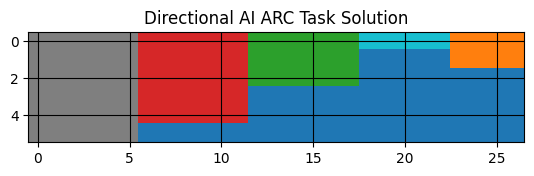

In [13]:
# Directional AI Adaptive Reasoning Logic for ARC Task b7999b51

def solve_arc_task(grid):
    import numpy as np

    # Get unique colors excluding background (assume 0 as background)
    unique_colors = np.unique(grid[grid > 0])

    # Initialize an empty list to store compressed color blocks
    compressed_blocks = []

    # Directional AI logic: compress colors into columns
    for color in unique_colors:
        color_positions = np.argwhere(grid == color)

        # Determine bounding box for each color
        min_row, min_col = np.min(color_positions, axis=0)
        max_row, max_col = np.max(color_positions, axis=0)

        # Store the shape (height and width) and color
        height, width = (max_row - min_row + 1), (max_col - min_col + 1)
        compressed_blocks.append((color, height, width))

    # Sort compressed blocks by width and height to stack them
    compressed_blocks.sort(key=lambda x: (-x[2], -x[1]))

    # Calculate output grid size
    out_height = max(block[1] for block in compressed_blocks)
    out_width = sum(block[2] for block in compressed_blocks)
    output_grid = np.zeros((out_height, out_width), dtype=int)

    # Fill output grid with compressed blocks
    current_col = 0
    for color, height, width in compressed_blocks:
        output_grid[:height, current_col:current_col + width] = color
        current_col += width

    return output_grid

# Example usage with ARC task visualization:
output = solve_arc_task(np.array(task_data['test'][0]['input']))
visualize_grid(output, title='Directional AI ARC Task Solution')


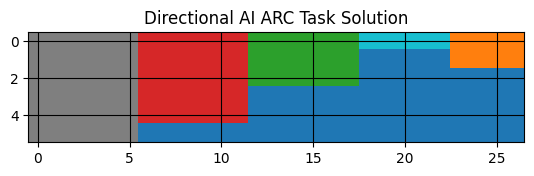

In [14]:
# Directional AI Adaptive Reasoning Logic for ARC Task b7999b51

def solve_arc_task(grid):
    import numpy as np

    # Get unique colors excluding background (assume 0 as background)
    unique_colors = np.unique(grid[grid > 0])

    # Initialize an empty list to store compressed color blocks
    compressed_blocks = []

    # Directional AI logic: compress colors into columns
    for color in unique_colors:
        color_positions = np.argwhere(grid == color)

        # Determine bounding box for each color
        min_row, min_col = np.min(color_positions, axis=0)
        max_row, max_col = np.max(color_positions, axis=0)

        # Store the shape (height and width) and color
        height, width = (max_row - min_row + 1), (max_col - min_col + 1)
        compressed_blocks.append((color, height, width))

    # Sort compressed blocks by width and height to stack them
    compressed_blocks.sort(key=lambda x: (-x[2], -x[1]))

    # Calculate output grid size
    out_height = max(block[1] for block in compressed_blocks)
    out_width = sum(block[2] for block in compressed_blocks)
    output_grid = np.zeros((out_height, out_width), dtype=int)

    # Fill output grid with compressed blocks
    current_col = 0
    for color, height, width in compressed_blocks:
        output_grid[:height, current_col:current_col + width] = color
        current_col += width

    return output_grid

# Example usage with ARC task visualization:
output = solve_arc_task(np.array(task_data['test'][0]['input']))
visualize_grid(output, title='Directional AI ARC Task Solution')
